## Car Prowls in Seattle

In what follows we will show that in the summer of 2014 car prowls have been the most often committed offenses, and we will have a look at regions in Seattle (within a hundred block radius) where they were the most likely to occur.

First, let's read in the data, and set the index for our Data Frame to be the date the offense occurred.

In [103]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv(
    'seattle_incidents_summer_2014.csv', 
    sep=',', 
    header=0, 
    parse_dates=['Occurred Date or Date Range Start', 'Occurred Date Range End'], 
    index_col='Occurred Date or Date Range Start'
)
print("Data ready")


RMS CDW ID                                 int64
General Offense Number                     int64
Offense Code                              object
Offense Code Extension                     int64
Offense Type                              object
Summary Offense Code                      object
Summarized Offense Description            object
Date Reported                             object
Occurred Date Range End           datetime64[ns]
Hundred Block Location                    object
District/Sector                           object
Zone/Beat                                 object
Census Tract 2000                        float64
Longitude                                float64
Latitude                                 float64
Location                                  object
Month                                      int64
Year                                       int64
dtype: object
Data ready


Now that we have the data loaded, let's see a top 10 of offenses.

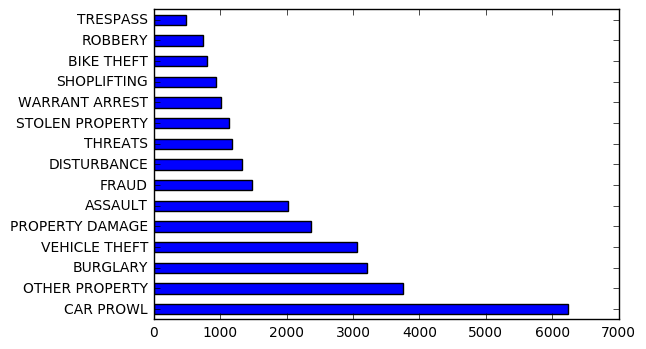

In [104]:
summarized_offense_counts = data['Summarized Offense Description'].value_counts()
summarized_offense_counts[:10].plot(kind="barh")
plt.show()

As we can see, the offenses tagged as "Car Prowl" have the highest number of occurrences in Seattle over the time range.

So, where were the hotspots for car prowlers in 2014? First, we filter the data for only car prowl offenses and extract a top 15. Then we get the total count of all offenses for the same hundred block radius to build the ratio. In the figure below we show the ratio: out of all offenses around the given location, how many were car prowls.

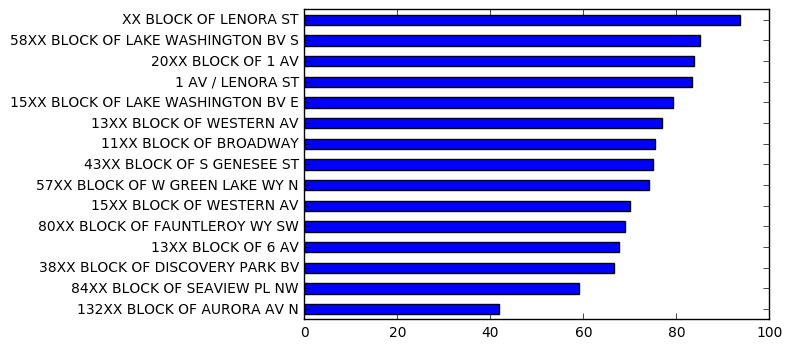

In [131]:
is_car_prowl = data['Summarized Offense Description'] == 'CAR PROWL'
car_prowl_offenses = data[is_car_prowl]
car_prowl_offenses_per_hundred_block = car_prowl_offenses['Hundred Block Location'].value_counts()


is_same_location = data['Hundred Block Location'].isin(car_prowl_offenses_per_hundred_block[:15].keys())

all_offenses_same_location = data[is_same_location]

all_offenses_same_location_count = all_offenses_same_location['Hundred Block Location'].value_counts()

percentages = (car_prowl_offenses_per_hundred_block[:15] / all_offenses_same_location_count[:15] * 100).astype(float).sort_values()
percentages.plot(kind='barh')
plt.show()


This shows us that the area around Lenora st was quite a problem as more than 90% of the offenses committed there were Car prowls!